In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\samsung\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = df.drop('Outcome', axis = 1)
X = X.to_numpy()

In [16]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [17]:
y = df['Outcome']

In [18]:
y.tail()

763    0
764    0
765    0
766    1
767    0
Name: Outcome, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(y)

Y = pd.get_dummies(y1).values

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.0001),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 0.7088 - accuracy: 0.3713 - val_loss: 0.7080 - val_accuracy: 0.3247
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.3779 - val_loss: 0.7056 - val_accuracy: 0.3701
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.3958 - val_loss: 0.7031 - val_accuracy: 0.3896
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.4218 - val_loss: 0.7007 - val_accuracy: 0.4221
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.4528 - val_loss: 0.6984 - val_accuracy: 0.4416
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4788 - val_loss: 0.6961 - val_accuracy: 0.4545
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4967 - val_loss: 0.6938 - val_accuracy: 0.4870
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5790 - accuracy: 0.6678 - val_loss: 0.5600 - val_accuracy: 0.7013
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.6678 - val_loss: 0.5581 - val_accuracy: 0.7013
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.6694 - val_loss: 0.5561 - val_accuracy: 0.7013
Epoch 62/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.6710 - val_loss: 0.5542 - val_accuracy: 0.7013
Epoch 63/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.6710 - val_loss: 0.5523 - val_accuracy: 0.6948
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.6710 - val_loss: 0.5505 - val_accuracy: 0.6948
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.6726 - val_loss: 0.5486 - val_accuracy: 0.6948
Epoch 

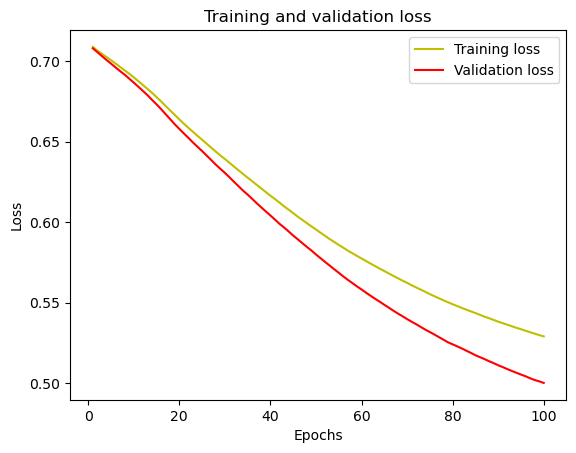

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

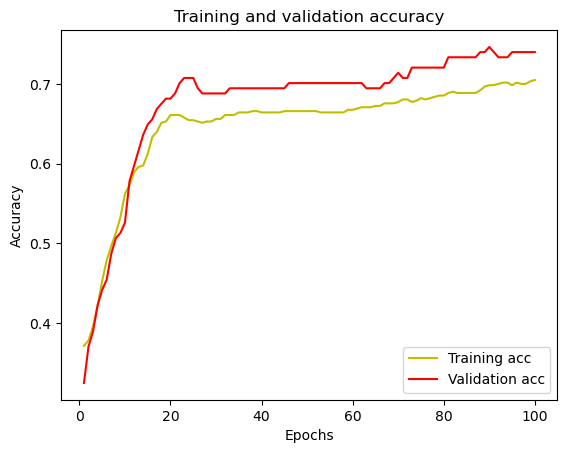

In [24]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()